## Import libraries

In [579]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [580]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [581]:
df = pd.read_csv('car-mpg.csv')

## EDA

In [582]:
df.shape

(392, 9)

In [583]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [585]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [586]:
df.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


In [587]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

## Fix

In [588]:
df.drop(columns=['name'], inplace=True)

## Feature Scaling

In [589]:
df = pd.get_dummies(df, columns=['origin'])

In [590]:
ms = StandardScaler()
ms.fit_transform(df)

array([[-0.69863841,  1.48394702,  1.07728956, ..., -0.45812285,
        -0.50239045,  0.77459667],
       [-1.08349824,  1.48394702,  1.48873169, ..., -0.45812285,
        -0.50239045,  0.77459667],
       [-0.69863841,  1.48394702,  1.1825422 , ..., -0.45812285,
        -0.50239045,  0.77459667],
       ...,
       [ 1.09737414, -0.86401356, -0.56847897, ..., -0.45812285,
        -0.50239045,  0.77459667],
       [ 0.5842277 , -0.86401356, -0.7120053 , ..., -0.45812285,
        -0.50239045,  0.77459667],
       [ 0.96908753, -0.86401356, -0.72157372, ..., -0.45812285,
        -0.50239045,  0.77459667]])

## Initial KMeans Model

In [591]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=0)

In [592]:
kmeans.cluster_centers_

array([[ 2.80677966e+01,  4.30508475e+00,  1.23523305e+02,
         8.25932203e+01,  2.38138136e+03,  1.62021186e+01,
         7.67838983e+01,  2.45762712e-01,  3.34745763e-01,
         4.19491525e-01],
       [ 1.64538462e+01,  7.23717949e+00,  3.01653846e+02,
         1.37564103e+02,  3.87953205e+03,  1.45416667e+01,
         7.47628205e+01,  6.41025641e-02, -2.77555756e-16,
         9.35897436e-01]])

In [593]:
kmeans.inertia_

72921226.71696986

In [594]:
print("silhouette_score", silhouette_score(df, kmeans.labels_))

silhouette_score 0.6366596256784105


## The Elbow Method

[3919.999999999999,
 2186.963126139652,
 1630.983105669787,
 1131.3292866255406,
 932.1714858974422,
 850.6040908255865,
 773.0923416634834,
 706.1064584930134,
 641.1949877941495,
 605.7317779246437]

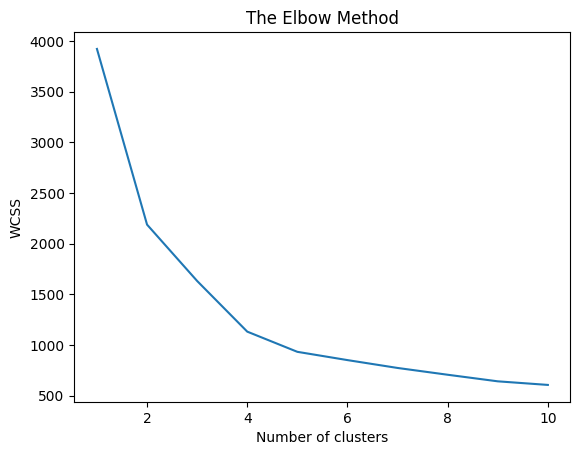

In [595]:
wcss =[]

for i in range(1, 11):
    kmeans = KMeans(i, init='k-means++', n_init = 10, random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')

wcss

## Final KMeans Model

In [596]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_pred = kmeans.fit_predict(df)

In [597]:
print("silhouette_score", silhouette_score(df, kmeans.labels_))

silhouette_score 0.5432637337589653
